# Assignment 3.1: Eigenmodes

This code runs part 3.1 of Assignment 3: Eigenmodes of drums or membranes of different shapes

In [ ]:
from src.diagonal_matrix import diagonal_matrix, visualize_diag_matrix, visualize_multiple_modes, get_eigenmodes, diagonal_rectangular, diagonal_circle, circular_domain, rectangular_domain
import numpy as np

### 1.1 Matrix of eigenvalue problem

The following function creates a diagonal Matrix for the eigenvalue problem with Dirichlet boundary conditions.

In [ ]:
# The length of the system matrix
length = 4

diag_M = diagonal_matrix(length)

print(diag_M)

Note: It may not be visible on the output, but the 4th position from (-4) in either direction contains a 1 such that: [..., 0, 1, 0, 0, 1, -4, 1, 0, 0, 1, 0, ...]. Except for the boundary, each row/column will contain 5 entries, alligning with the 5-point-stencil. 

We can visualize this matrix with the following function. Note that for larger values of N, you should pass the parameter text='OFF'. 

In [ ]:
fig = visualize_diag_matrix(diag_M, length)

We can also visualise the matrix of the circular and rectangular grid

In [ ]:
# Rectangular (L by 2L)

diag_M = diagonal_rectangular(length)

# Number of rows/columns
N = 8
fig = visualize_diag_matrix(diag_M, N, text='OFF')

In [ ]:
# Circular 
N = 9

diag_M = diagonal_matrix(N)
grid = circular_domain(N)
diag_M = diagonal_circle(grid, diag_M, N)

fig = visualize_diag_matrix(diag_M, N, text='OFF')


### 1.2 Eigenmodes

We can now get and visualise the eigenmodes with the following function. We will take a larger matrix to better visualise it. Note that high values for N and multiple modes will take longer to run.

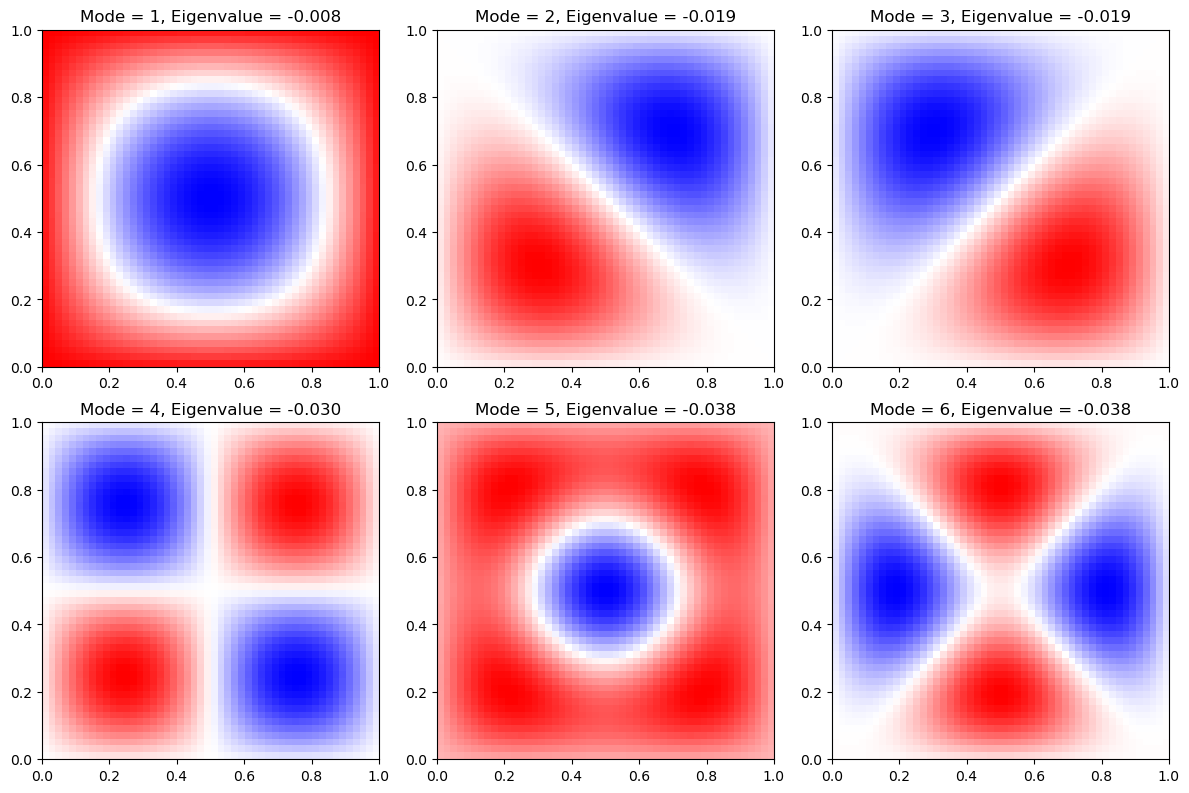

In [3]:
# Number of modes to display
modes = 6
length = 50

diag_M = diagonal_matrix(length)

eigenvalues, _, _, eigenmodes = get_eigenmodes(diag_M, length, modes)
visualize_multiple_modes(eigenmodes, eigenvalues, length, modes)


### 1.3 Eigenmodes of Rectangular and Circular grid

In [ ]:
def get_eigenmodes_rectangular(M, L, modes=6):
    """Compute eigenmodes for a rectangular grid of size (L x 2L)."""

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = scipy.linalg.eigh(M)
    sorted_eig = np.argsort(np.abs(eigenvalues))[:modes]

    # Select the smallest eigenvalues and their corresponding eigenvectors
    eigenvectors = eigenvectors[:, sorted_eig]
    eigenvalues = eigenvalues[sorted_eig]

    # Reshape eigenmodes to match rectangular shape (L x 2L)
    eigenmodes = eigenvectors.reshape(L, 2*L, -1)
    
    return eigenvalues, eigenvectors, sorted_eig, eigenmodes


# Rectangular
modes = 6
length = 50

# Rectangular (L by 2L)
diag_M = diagonal_rectangular(length)

# Number of rows/columns
eigenvalues, _, _, eigenmodes = get_eigenmodes_rectangular(diag_M, length, modes)
visualize_multiple_modes(eigenmodes, eigenvalues, length, modes)


KeyboardInterrupt: 